In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score

In [4]:
train_data = pd.read_csv('SalaryData_Train.csv')
test_data = pd.read_csv('SalaryData_Test.csv')

In [5]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18640,62,Self-emp-not-inc,HS-grad,9,Never-married,Other-service,Unmarried,White,Female,0,0,6,United-States,<=50K
18641,44,Private,Some-college,10,Divorced,Craft-repair,Not-in-family,White,Male,0,0,55,United-States,<=50K
18642,28,Local-gov,HS-grad,9,Married-civ-spouse,Protective-serv,Husband,White,Male,3908,0,40,United-States,<=50K
18643,68,Local-gov,Masters,14,Widowed,Prof-specialty,Unmarried,Black,Female,0,0,40,United-States,>50K


In [6]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18645 entries, 0 to 18644
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            18645 non-null  int64 
 1   workclass      18645 non-null  object
 2   education      18645 non-null  object
 3   educationno    18645 non-null  int64 
 4   maritalstatus  18645 non-null  object
 5   occupation     18645 non-null  object
 6   relationship   18645 non-null  object
 7   race           18645 non-null  object
 8   sex            18645 non-null  object
 9   capitalgain    18645 non-null  int64 
 10  capitalloss    18645 non-null  int64 
 11  hoursperweek   18645 non-null  int64 
 12  native         18645 non-null  object
 13  Salary         18644 non-null  object
dtypes: int64(5), object(9)
memory usage: 2.0+ MB


In [8]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [9]:
# frequency for categorical fields
category_col =['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'native', 'Salary']
for c in category_col:
    print (c)
    print (train_data[c].value_counts())
    print('\n')

workclass
 Private             13735
 Self-emp-not-inc     1569
 Local-gov            1293
 State-gov             787
 Self-emp-inc          664
 Federal-gov           591
 Without-pay             6
Name: workclass, dtype: int64


education
 HS-grad         6174
 Some-college    4103
 Bachelors       3146
 Masters         1002
 Assoc-voc        800
 11th             636
 Assoc-acdm       604
 10th             524
 7th-8th          341
 Prof-school      316
 9th              277
 Doctorate        231
 12th             213
 5th-6th          171
 1st-4th           87
 Preschool         20
Name: education, dtype: int64


maritalstatus
 Married-civ-spouse       8646
 Never-married            6037
 Divorced                 2620
 Separated                 582
 Widowed                   519
 Married-spouse-absent     228
 Married-AF-spouse          13
Name: maritalstatus, dtype: int64


occupation
 Prof-specialty       2498
 Craft-repair         2467
 Exec-managerial      2426
 Adm-clerical   

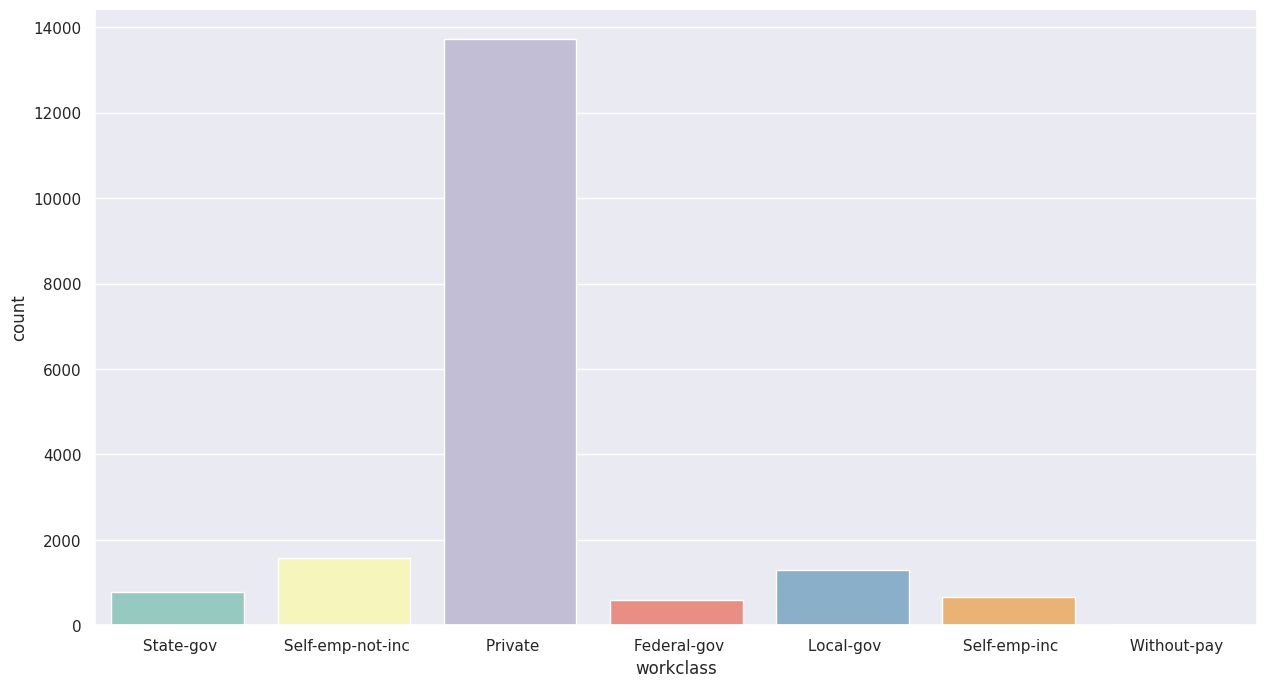

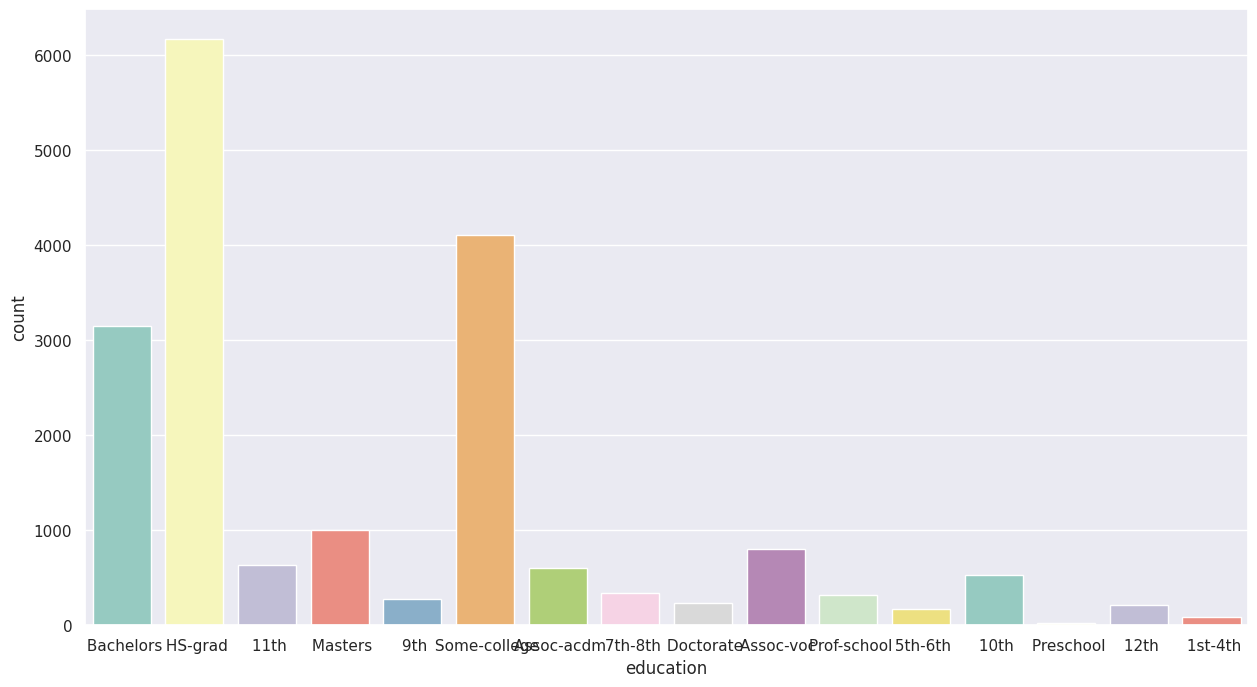

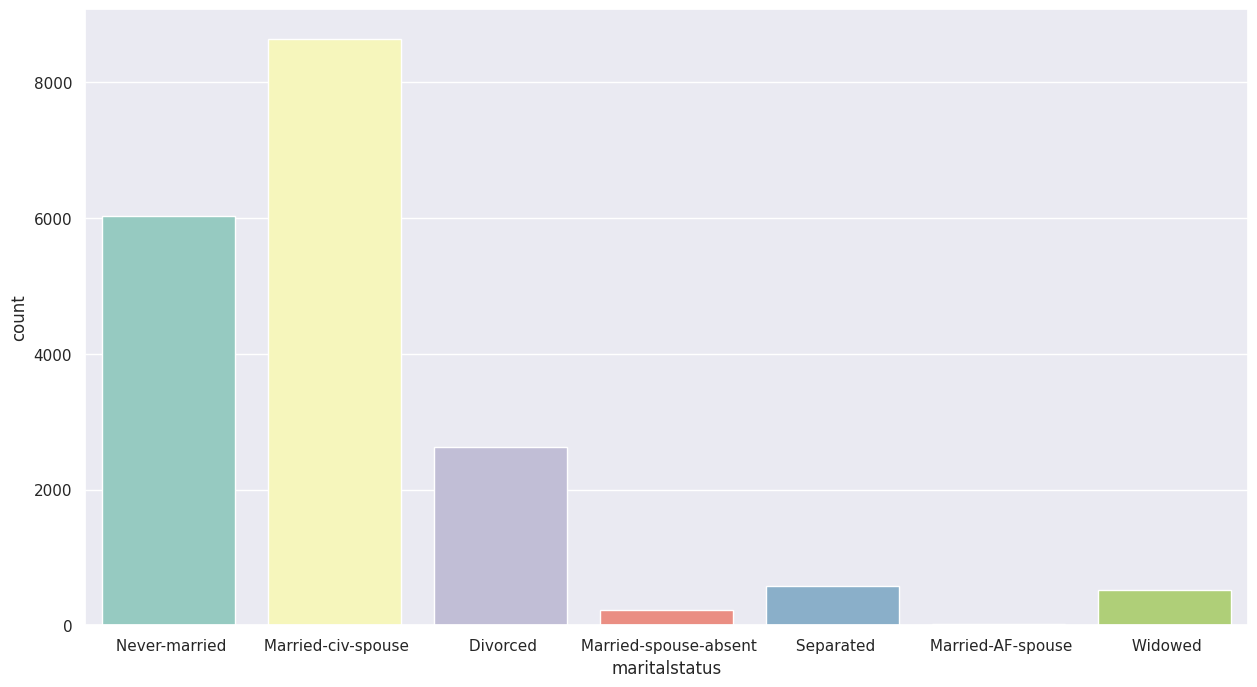

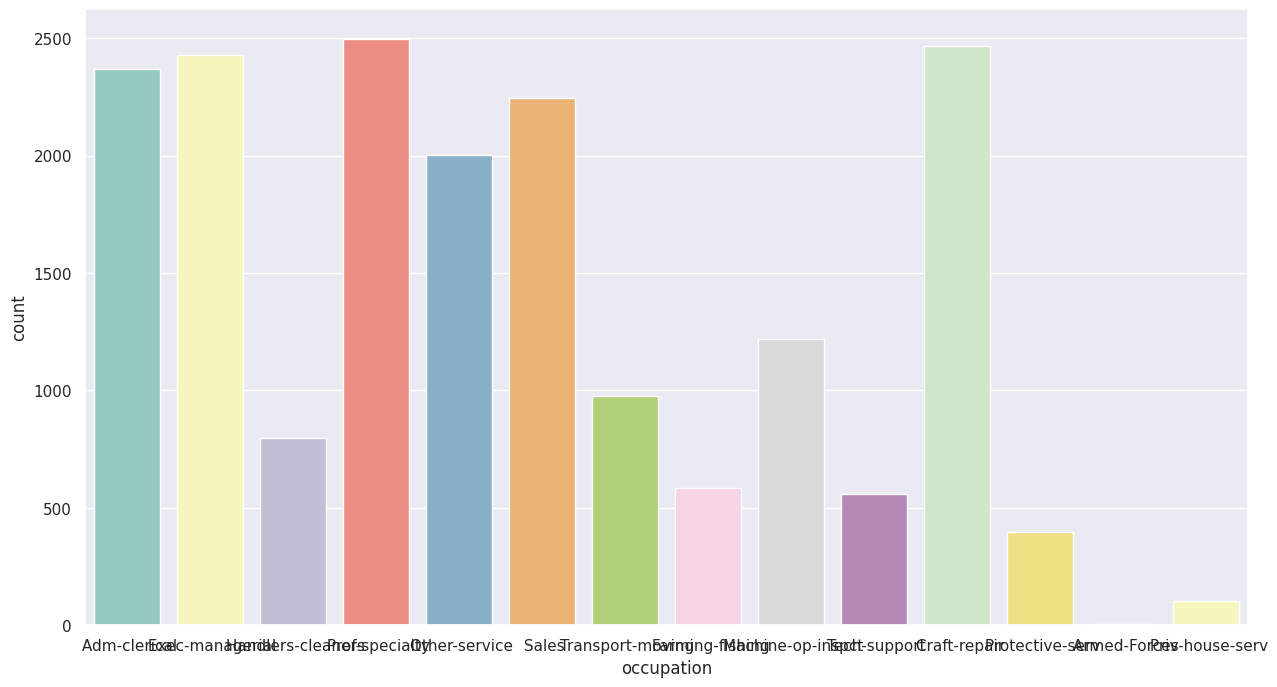

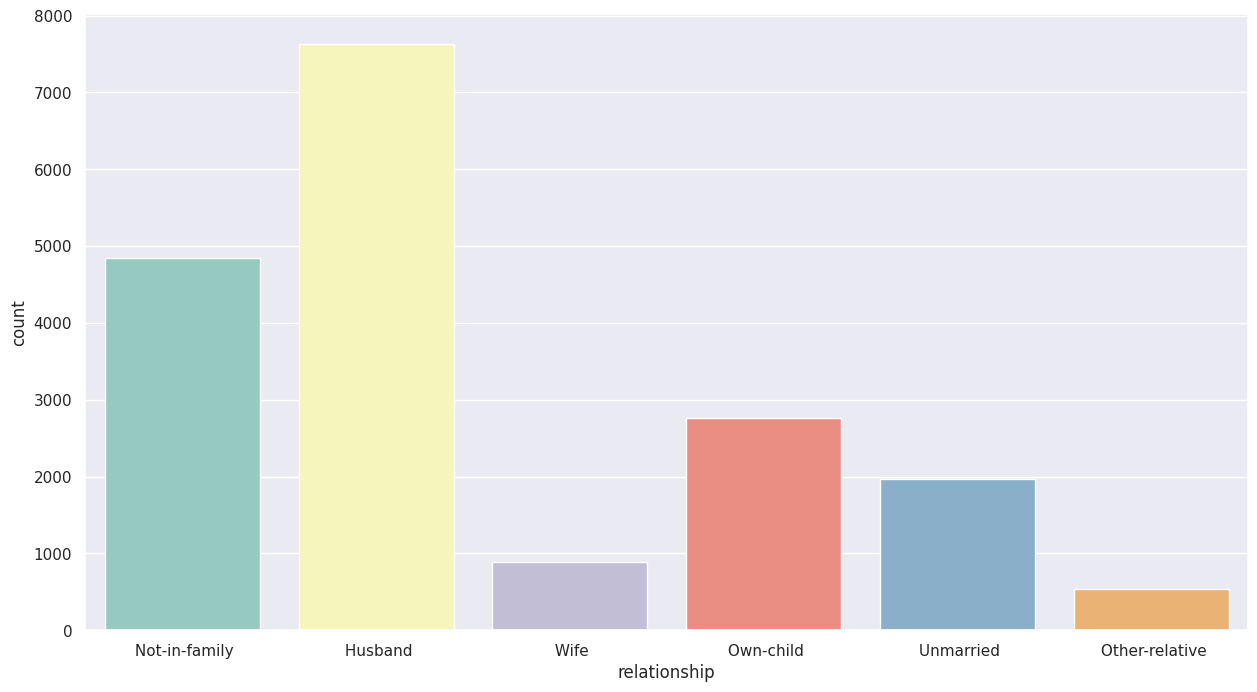

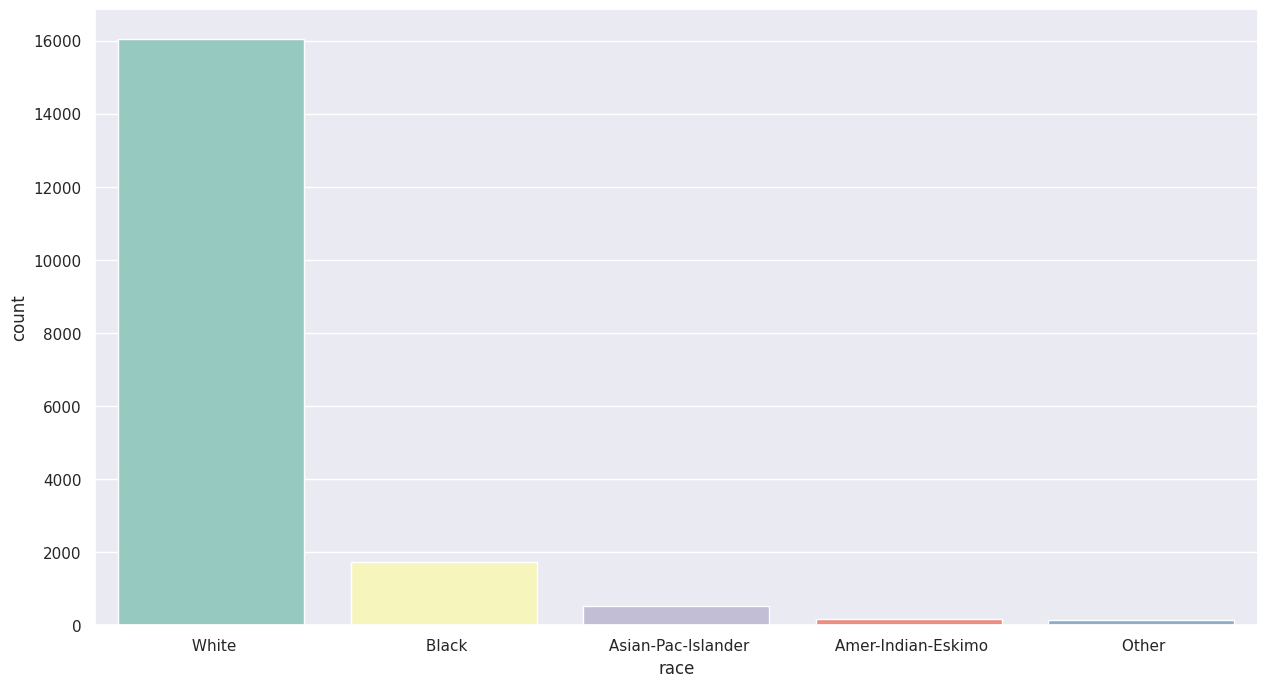

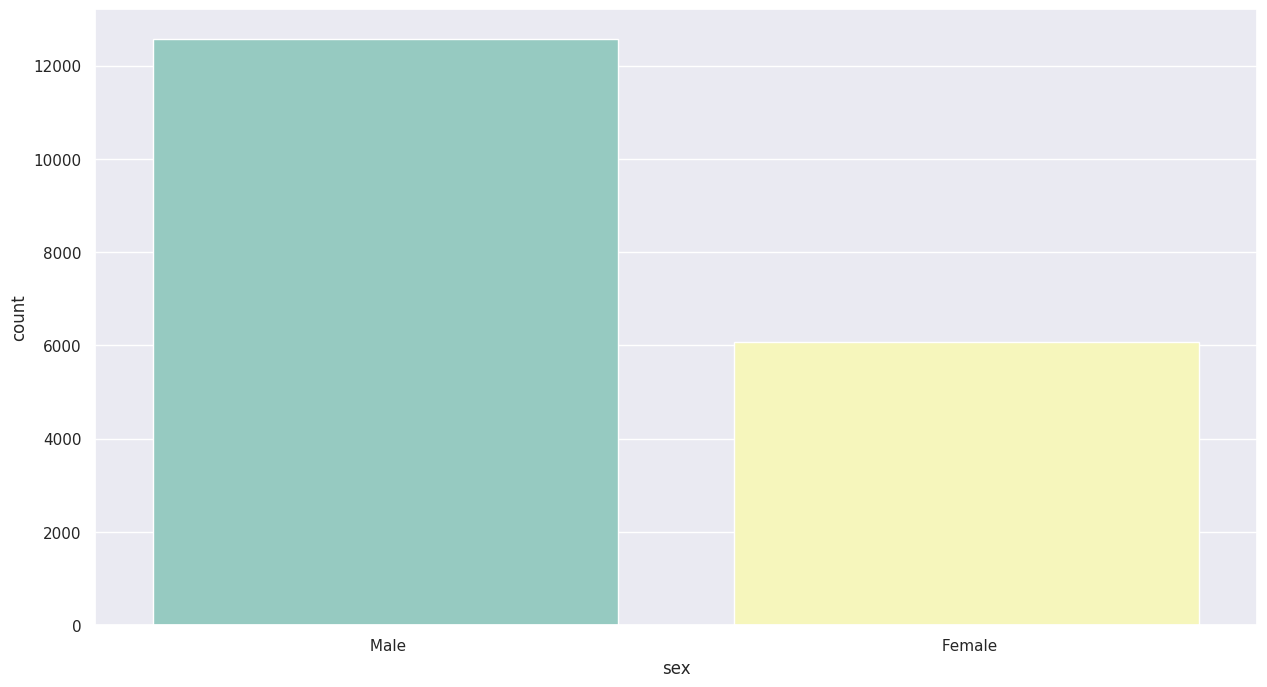

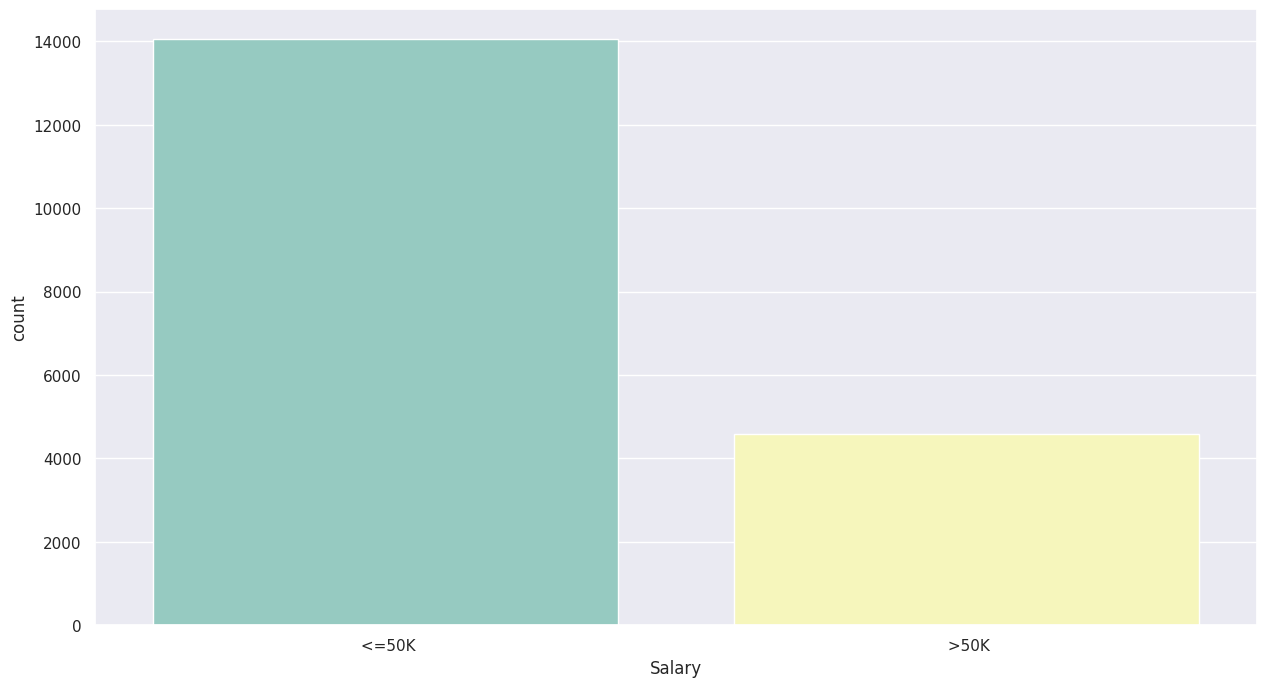

In [10]:
# countplot for all categorical columns
import seaborn as sns
sns.set(rc={'figure.figsize':(15,8)})
cat_col = ['workclass', 'education','maritalstatus', 'occupation', 'relationship', 'race', 'sex','Salary']
for col in cat_col:
    plt.figure() #this creates a new figure on which your plot will appear
    sns.countplot(x = col, data = train_data, palette = 'Set3');

In [11]:
train_data[['Salary', 'age']].groupby(['Salary'], as_index=False).mean().sort_values(by='age', ascending=False)

,Salary,age
1,>50K,43.902141
0,<=50K,36.729347


In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
train_data = train_data.apply(LabelEncoder().fit_transform)
train_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,21,0,39,38,0
1,33,4,9,12,2,3,0,4,1,0,0,12,38,0
2,21,2,11,8,0,5,1,4,1,0,0,39,38,0
3,36,2,1,6,2,5,0,2,1,0,0,39,38,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [14]:
test_data = test_data.apply(LabelEncoder().fit_transform)
test_data.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [15]:
#Test-Train Split
drop_elements = ['education', 'native', 'Salary']
x = train_data.drop(drop_elements, axis=1)
y = train_data['Salary']

In [16]:
x

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek
0,22,5,12,4,0,1,4,1,21,0,39
1,33,4,12,2,3,0,4,1,0,0,12
2,21,2,8,0,5,1,4,1,0,0,39
3,36,2,6,2,5,0,2,1,0,0,39
4,11,2,12,2,9,5,2,0,0,0,39
...,...,...,...,...,...,...,...,...,...,...,...
18640,45,4,8,4,7,4,4,0,0,0,5
18641,27,2,9,0,2,1,4,1,0,0,54
18642,11,1,8,2,10,0,4,1,59,0,39
18643,51,1,13,6,9,4,2,0,0,0,39


In [17]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18640    0
18641    0
18642    0
18643    1
18644    2
Name: Salary, Length: 18645, dtype: int64

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [19]:
# Preparing a naive bayes model on training data set

from sklearn.naive_bayes import MultinomialNB as MB
from sklearn.naive_bayes import GaussianNB as GB

# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(x_train, y_train)

MultinomialNB()

In [20]:
score_multinomial = classifier_mb.score(x_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_multinomial)

The accuracy of Gaussian Naive Bayes is 0.7794571753616122


In [21]:
# Gaussian Naive Bayes
classifier_gb = GB()
classifier_gb.fit(x_train, y_train)

GaussianNB()

In [22]:
score_gaussian = classifier_gb.score(x_test,y_test)
print('The accuracy of Gaussian Naive Bayes is', score_gaussian)

The accuracy of Gaussian Naive Bayes is 0.8090362424833415


In [23]:
drop_elements = ['education', 'native', 'Salary']
X = test_data.drop(drop_elements, axis=1)

Y = test_data['Salary']

In [24]:
from sklearn import metrics

# make predictions
new_prediction = classifier_gb.predict(X)
# summarize the fit of the model
print(metrics.classification_report(Y, new_prediction))
print(metrics.confusion_matrix(Y, new_prediction))

print("Accuracy:",metrics.accuracy_score(Y, new_prediction))
print("Precision:",metrics.precision_score(Y, new_prediction))
print("Recall:",metrics.recall_score(Y, new_prediction))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88     11360
           1       0.68      0.45      0.54      3700

    accuracy                           0.81     15060
   macro avg       0.76      0.69      0.71     15060
weighted avg       0.80      0.81      0.80     15060

[[10578   782]
 [ 2023  1677]]
Accuracy: 0.8137450199203188
Precision: 0.6819845465636437
Recall: 0.4532432432432432
